<a href="https://colab.research.google.com/github/amey-joshi/am/blob/master/fdtd/em_simulation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What happens to the electromagnetic fields when the there are two hard gaussian sources equidistant from the centre? They interfere. To see the interference, increase the number of steps gradually from $100$ onwards.

This is the problem 1.2 in the book **Electromagnetic Simulation Using the FDTD Method with Python** by **Houle, Jennifer E and Sullivan, Dennis M**, published by John Wiley & Sons in 2020.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Parameters of the problem.
ke = 200

ex = np.zeros(ke)
hy = np.zeros(ke)

kc = ke//2
t0 = 40
spread = 12

nsteps = 120

def reset_fields():
  ex[:] = 0
  hy[:] = 0

def compute_fields():
  for k in range(1, ke):
    ex[k] += 0.5 * (hy[k-1] - hy[k])

  pulse = np.exp(-0.5 * ((t - t0)/spread)**2)
  # There are two pulses, 50 cells on either side of the centre.
  ex[kc + 50] = pulse
  ex[kc - 50] = pulse

  for k in range(ke - 1):
    hy[k] += 0.5 * (ex[k] - ex[k+1])

In [33]:
reset_fields()

for t in range(nsteps):
  compute_fields()

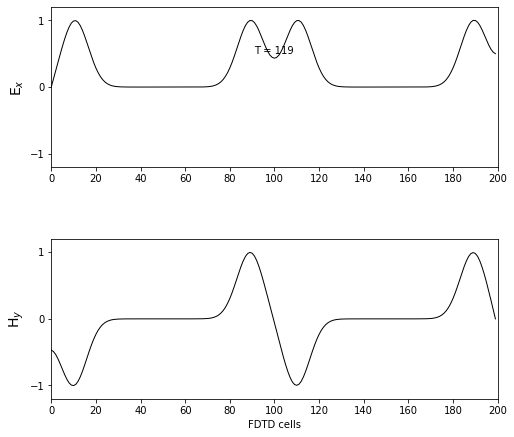

In [34]:
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.plot(ex, color='k', linewidth=1)
plt.ylabel('E$_x$', fontsize='14')
plt.xticks(np.arange(0, ke + 1, step=20))
plt.xlim(0, 200)
plt.yticks(np.arange(-1, 1.2, step=1))
plt.ylim(-1.2, 1.2)
plt.text(100, 0.5, 'T = {}'.format(t), horizontalalignment='center')
plt.subplot(212)
plt.plot(hy, color='k', linewidth=1)
plt.ylabel('H$_y$', fontsize='14')
plt.xlabel('FDTD cells')
plt.xticks(np.arange(0, ke + 1, step=20))
plt.xlim(0, 200)
plt.yticks(np.arange(-1, 1.2, step=1))
plt.ylim(-1.2, 1.2)
plt.subplots_adjust(bottom=0.2, hspace=0.45)
plt.show()